In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import re

In [2]:
#✅RUN
shark = pd.read_csv("data/attacks.csv",encoding = "ISO-8859-1")

In [3]:
#✅RUN
shark.info()
'''Número de caso, fecha, edad, Time, Case Number 1 y 2 
    son un tipo de datos string,
    para trabajar con ello se debe cambiar a number'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

'Número de caso, fecha, edad, Time, Case Number 1 y 2 \n    son un tipo de datos string,\n    para trabajar con ello se debe cambiar a number'

In [4]:
#✅RUN
shark.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
23058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#✅RUN
shark.shape

(25723, 24)

In [6]:
#✅RUN
#Elimino las columnas que no voy a utilizar para la hipótesis
shark = shark.drop(['pdf','href','Case Number.1','Case Number.2','original order','Unnamed: 22','Unnamed: 23'], axis=1)

In [7]:
#✅RUN
'''Muestro una descripción de los datos:
count: contabiliza el total de datos
unique: total de valores únicos
top: el valor que más se repite
freq: frecuencia con la que se repite el valor anterior'''
shark.describe(include='O')

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href formula
count,8702,6302,6298,6252,5847,5762,5758,6092,5737,3471,6274,5763,2948,3464,6285,6301
unique,6287,5433,8,212,825,4108,1532,5230,6,157,3737,8,366,1549,4969,6290
top,0,1957,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,17,FATAL,N,Afternoon,White shark,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
freq,2400,11,4595,2229,1037,163,971,550,5094,154,802,4293,187,163,105,2


In [8]:
#shark.sample()

In [9]:
#✅RUN
'''Si utilizo esta columna debo convertir las fechas a el mismo formato todas Date(dd-Month-yyyy) 
para tener uniformidad'''
shark["Date"].unique()

array(['25-Jun-2018', '18-Jun-2018', '09-Jun-2018', ..., '1883-1889',
       '1845-1853', nan], dtype=object)

In [10]:
#✅RUN
'''Todas las columnas tienen gran cantidad de datos nulos'''
mising_values_count = shark.isna().sum()
mising_values_count

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
href formula              19422
dtype: int64

In [11]:
#✅RUN
#Verificar el porcentaje de datos nulos
total_cells = np.product(shark.shape)
total_missing = mising_values_count.sum()

percentage = round((total_missing/total_cells) * 100)
percentage
#El 78% de las celdas tienen datos nulos

78

In [12]:
#shark.shape

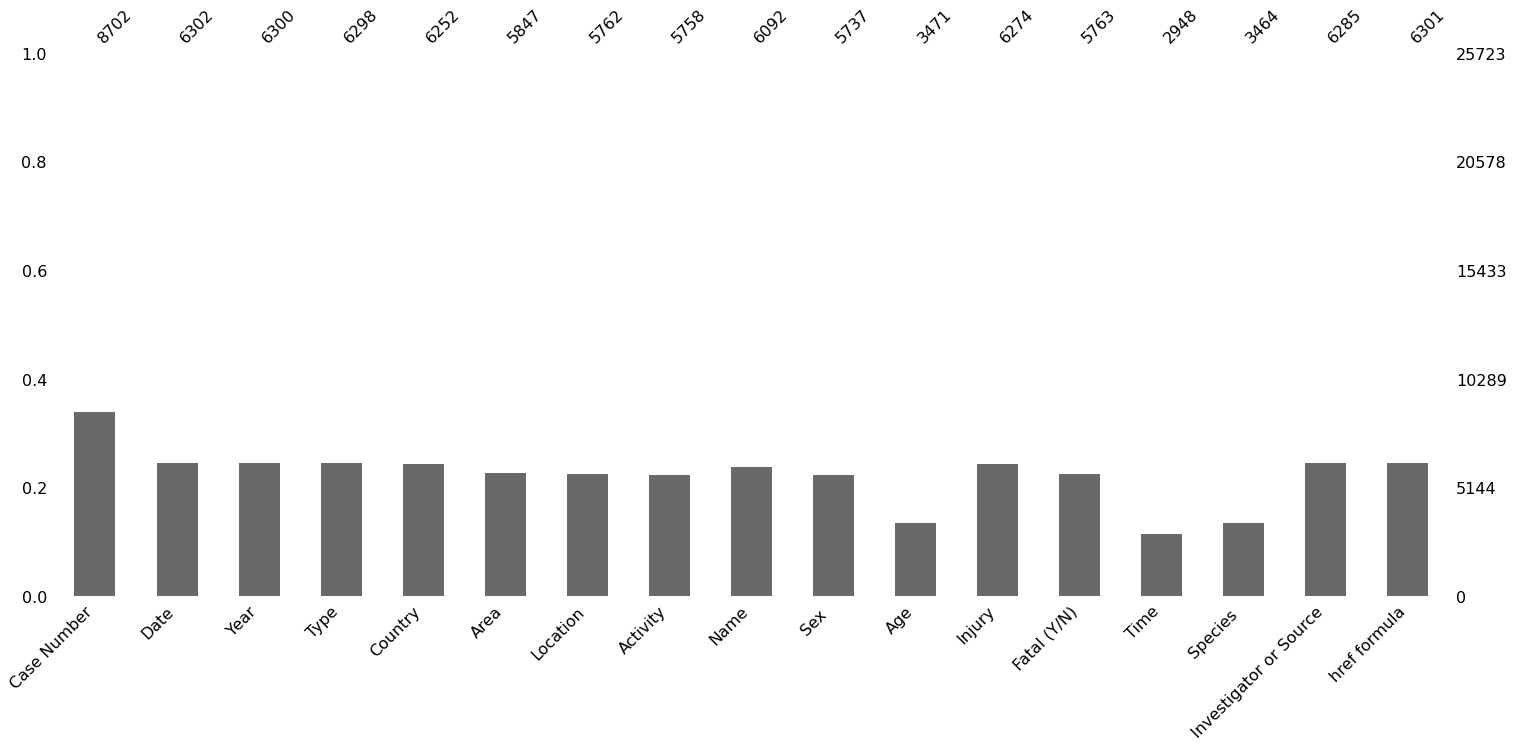

In [13]:
#✅RUN
'''Veo en una gráfica cuantos datos están correctos (número de arriba) en base al número de filas, 
se observa que faltan muchos valores'''
msno.bar(shark); 

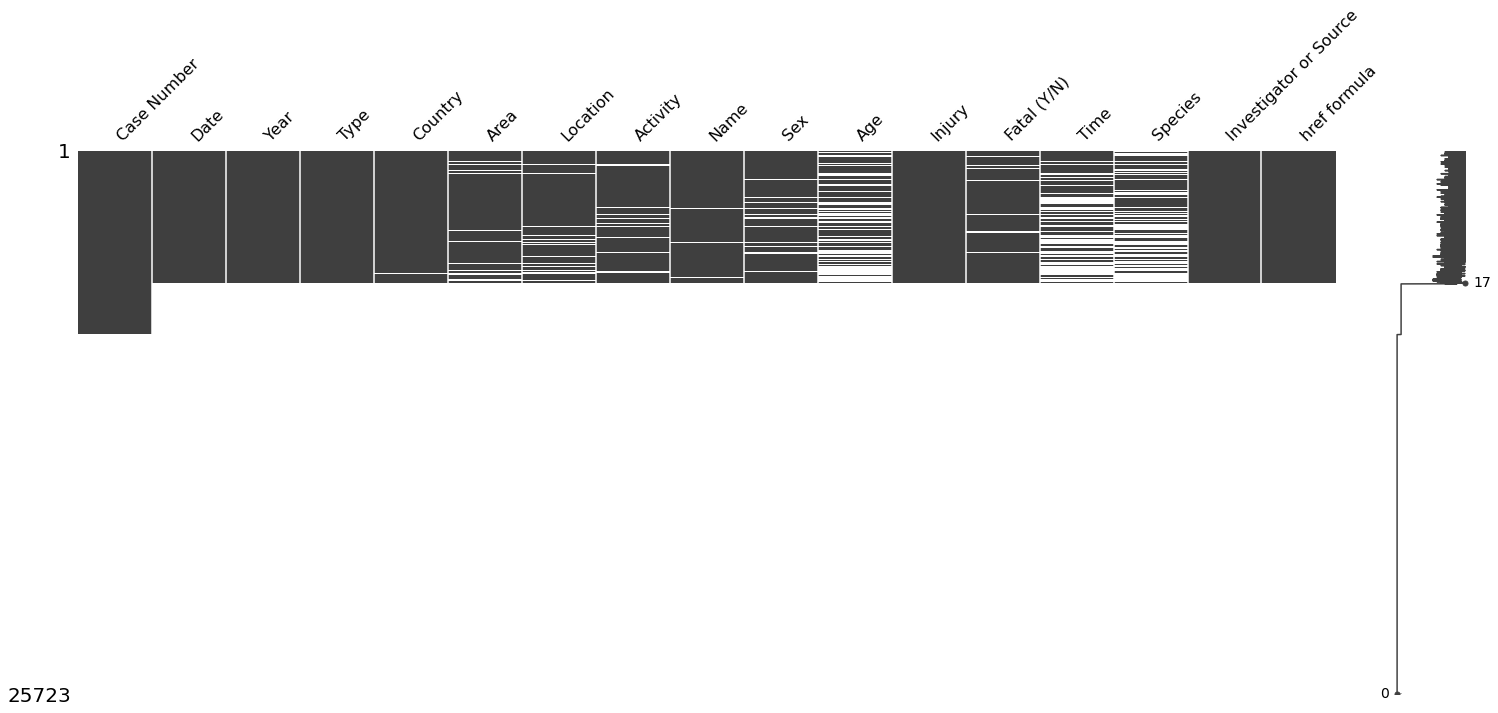

In [14]:
#✅RUN
'''Las barras con más líneas en blanco indica la ubicación de los datos nulos,
las más perjudicadas son Age, Time y Species'''
msno.matrix(shark);

In [15]:
'''Observamos que las últimas filas tienen casi todos sus valores NaN pero sin saber con
exactitud cuantas columnas son'''
#shark[shark.isna().any(1)]

'Observamos que las últimas filas tienen casi todos sus valores NaN pero sin saber con\nexactitud cuantas columnas son'

In [16]:
#✅RUN
#Elimino las filas que al menos tienen 15 de las 17 columnas valores que no son NaN
shark_clean = shark.dropna(axis=0, thresh=15)

In [17]:
#✅RUN
shark_clean.shape

(4138, 17)

In [18]:
#✅RUN
#Verifico cuantos NaN quedan
shark_clean.isna().sum()

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                      0
Area                        46
Location                    49
Activity                    55
Name                         5
Sex                         60
Age                        877
Injury                       1
Fatal (Y/N)                212
Time                      1298
Species                   1310
Investigator or Source       3
href formula                 0
dtype: int64

In [19]:
#✅RUN
'''Muestro una descripción de los datos:
count: contabiliza el total de datos
unique: total de valores únicos
top: el valor que más se repite
freq: frecuencia con la que se repite el valor anterior'''
shark_clean.describe(include='O')

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href formula
count,4138,4138,4138,4138,4092,4089,4083,4133,4078,3261,4137,3926,2840,2828,4135,4138
unique,4130,3665,7,132,495,2964,941,3753,5,148,2668,6,354,1384,3360,4132
top,1962.06.11.b,12-Apr-2001,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,18,FATAL,N,Afternoon,White shark,"S. Petersohn, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
freq,2,5,3306,1788,899,160,893,261,3565,142,337,3227,181,140,82,2


In [20]:
'''Las especies no están unificadas, hay descripciones y no nombres concreto'''
#shark_clean["Species "].unique()

'Las especies no están unificadas, hay descripciones y no nombres concreto'

In [21]:
#✅RUN
#Verificar que no hay duplicados en las columnas
shark_clean[shark_clean.duplicated(subset=['Case Number','Date','Year','Type','Country','Area','Location','Activity','Name','Sex ','Age','Injury','Fatal (Y/N)','Time','Species ','Investigator or Source','href formula'],keep=False)]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href formula


In [22]:
#✅RUN
#Reemplazo los nombres de las columnas
shark_clean.columns = shark_clean.columns.str.replace(' ', '')
shark_clean.head()


,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N),Time,Species,InvestigatororSource,hrefformula
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,http://sharkattackfile.net/spreadsheets/pdf_di...


In [23]:
#✅RUN
#Convertir la columna de fecha en tipo Date
shark_clean["Date"].unique()

array(['25-Jun-2018', '18-Jun-2018', '09-Jun-2018', ..., '1940 - 1950',
       'Before 1906', '1845-1853'], dtype=object)

In [24]:
#shark_clean

In [25]:
#✅RUN
#Convierto todo a tipo Date y lo que no puede convertir muestra el error con tipo de dato NaT
shark_clean["NewDate"] = pd.to_datetime(shark_clean["Date"], errors='coerce')

<ipython-input-25-59cb7de7cf2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_clean["NewDate"] = pd.to_datetime(shark_clean["Date"], errors='coerce')


In [26]:
#shark_clean

In [27]:
#✅RUN
#Extraigo solo el mes
shark_clean["NewMonth"] = shark_clean["NewDate"].dt.strftime('%m')

<ipython-input-27-2ebb79799d05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_clean["NewMonth"] = shark_clean["NewDate"].dt.strftime('%m')


In [28]:
shark_clean.sample()

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N),Time,Species,InvestigatororSource,hrefformula,NewDate,NewMonth
2889,1984.07.24.a,24-Jul-1984,1984.0,Unprovoked,USA,Texas,South Padre Island,Swimming,Carmen Gaytan,F,18,Legs severely lacerated,N,12h00,1.2 m [4'] shark,"A. MacCormick, pp.8-9",http://sharkattackfile.net/spreadsheets/pdf_di...,1984-07-24,07


In [29]:
#✅RUN
#Reemplazo los meses númericos por texto
shark_clean["NewMonth"].replace({"01": "Jan","02": "Feb","03":"Mar","04":"Apr","05":"May","06":"Jun","07":"Jul","08":"Agu","09":"Sep","10":"Oct","11":"Nov","12":"Dec"}, inplace=True)

/opt/anaconda3/envs/ironhack/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [30]:
#shark_clean

In [31]:
#✅RUN
#Obtengo los años
shark_clean["NewYear"] = shark_clean["NewDate"].dt.strftime('%Y')

<ipython-input-31-44597b16e2c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_clean["NewYear"] = shark_clean["NewDate"].dt.strftime('%Y')


In [32]:
#shark_clean

In [33]:
#✅RUN
'''Obtengo los días (puede ser útil para ver los casos que suceden a principios o finales de los meses aunque no será 
muy representativo por que hay muchos NaN)'''
shark_clean["NewDay"] = shark_clean["NewDate"].dt.strftime('%d')

<ipython-input-33-63d017229873>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_clean["NewDay"] = shark_clean["NewDate"].dt.strftime('%d')


In [34]:
#shark_clean

In [35]:
#✅RUN
#Borro la columna Date que ya no necesito
shark_clean.drop(['Date'], axis=1, inplace=True)

/opt/anaconda3/envs/ironhack/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
#✅RUN
#Borro la columna Year porque el año ya lo tengo en la nueva columna NewYear
shark_clean.drop(['Year'], axis=1, inplace=True)

In [37]:
#Esta columna tiene datos válidos
shark_clean["Type"].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Boat', 'Sea Disaster'], dtype=object)

In [38]:
#Esta columna tiene datos válidos
#shark_clean["Country"].unique()

In [39]:
#No son útiles todos los datos, hay localizaciones inespecíficas y coordenadas, no son datos uniformes
#shark_clean["Area"].unique()

In [40]:
#No son útiles todos los datos, hay localizaciones inespecíficas
#shark_clean["Location"].unique()

In [41]:
#shark_clean["Activity"].unique()

In [42]:
#shark_clean["Age"].unique()

In [122]:
#✅RUN
#Función para obtener las edades limpias
def newAge(x):
    try:
        if int(x) in list(range(100)):
            return int(x)
    except:
        return np.nan
        next

In [123]:
#✅RUN
#Creo una nueva columna NewAge para guardar las edades aplicando la función
shark_clean['NewAge'] = shark_clean.Age.apply(newAge)

<ipython-input-123-4613a27da8f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_clean['NewAge'] = shark_clean.Age.apply(newAge)


In [129]:
shark_clean.sample()

,CaseNumber,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N),Time,Species,InvestigatororSource,hrefformula,NewDate,NewMonth,NewYear,NewDay,NewAge
79,2017.09.24.b,Invalid,USA,New York,Rockaway,Surfing,Michah Behrend,M,33,"Lacerations to right ankle, foot & toe",NaN,15h30,Questionable,"S. Curatolo-Wageman, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,2017-09-24,Sep,2017,24,33.0


In [131]:
#shark_clean["NewAge"]

In [132]:
#✅RUN
#Verifico los valores para limpiarlos, solo me quedo con M y F
shark_clean['Sex'].unique()

array(['F', 'M', nan, 'M ', 'lli', 'N'], dtype=object)

In [133]:
#✅RUN
#Función para limpiar la columna Sex
def sex(x):
    if x not in ("F","M"):
        return 'unknown'
    else:
        return x        

In [134]:
#✅RUN
#Aplico la función sobre la columna
shark_clean['Sex'] = shark_clean.Sex.apply(sex)

<ipython-input-134-9b48b9460c0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_clean['Sex'] = shark_clean.Sex.apply(sex)


In [135]:
#shark_clean["Sex"].unique()

In [136]:
shark_clean["Fatal(Y/N)"].unique()

array(['N', 'Y', nan, 'M', '2017', 'UNKNOWN', ' N'], dtype=object)

In [137]:
#✅RUN
#Cambio el nombre de la columna Fatal(Y/N) para que no de problemas al hacer la función 
shark = shark_clean.rename(columns={'Fatal(Y/N)':'Fatal'})

In [138]:
shark.sample()

,CaseNumber,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,InvestigatororSource,hrefformula,NewDate,NewMonth,NewYear,NewDay,NewAge
3937,1961.01.01,Unprovoked,COLUMBIA,Roncador Bank,"Roncador Bank, 135 nm north of San Andres",Taking boat from California to Florida when it...,Joe Chaney,M,NaN,Leg bitten,N,NaN,1.8 m [6'] shark,V.M. Coppleson (1962) p.246,http://sharkattackfile.net/spreadsheets/pdf_di...,1961-01-01,Jan,1961,01,NaN


In [139]:
#✅RUN
#Función para limpiar la columna Fatal
def fatal(x):
    if x not in ("Y","N"):
        return 'unknown'
    else:
        return x  

In [140]:
#✅RUN
#Creo nueva columna donde aplico la función fatal
shark['NewFatal'] = shark.Fatal.apply(fatal)

In [141]:
#shark['NewFatal'].unique()

In [142]:
#shark['Species'].unique().tolist()

In [143]:
#✅RUN
#Creo el regex para seleccionar la palabra que está antes de shark
pattern = "\w{3,}(?= shark)"

In [144]:
#✅RUN
'''Función para limpiar la columna de especie, el parámetro lo debo convertir en string porque tiene 
elementos nan que interpreta como float. El retorno de búsqueda es un array por eso le paso la posición 0. 
El .title pone la primera letra de la palabra en mayúscula.
El return es np.nan para que directamente devuelva un valor nan y así los excluye en las visualizaciones'''
def species(x):
    busqueda = re.findall(pattern, str(x))
    try:
        return busqueda[0].title()
    except:
        return np.nan

In [145]:
shark["NewSpecies"] = shark.Species.apply(species)

In [146]:
shark.columns

Index(['CaseNumber', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name',
       'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'InvestigatororSource', 'hrefformula', 'NewDate', 'NewMonth', 'NewYear',
       'NewDay', 'NewAge', 'NewFatal', 'NewSpecies'],
      dtype='object')

In [147]:
#✅RUN
#Borro las columnas que no necesito para los gráficos
shark.drop(['CaseNumber','Name','Injury','Name','Injury','InvestigatororSource','hrefformula','Species'], axis=1, inplace=True)

In [150]:
shark.shape

(4138, 16)

In [151]:
#✅RUN
#Guardar el DF en un archivo csv
shark.to_csv('data/clean.csv')